In [2]:
import numpy as np
import pandas as pd
df = pd.read_csv('diabetes.csv')
df.head() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


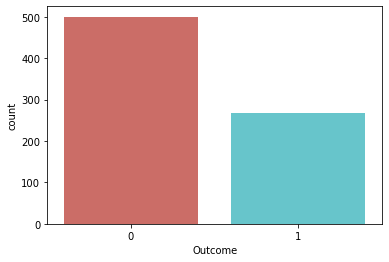

In [7]:
import seaborn as sb
%matplotlib inline
sb.countplot(x='Outcome',data=df, palette='hls')

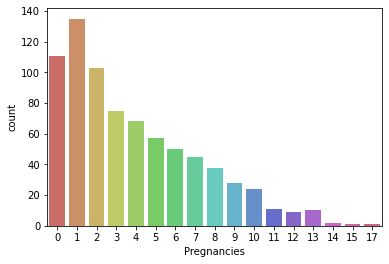

In [8]:
sb.countplot(x='Pregnancies',data=df, palette='hls')

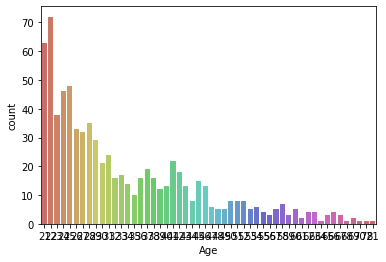

In [9]:
sb.countplot(x='Age',data=df, palette='hls')

In [10]:
columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
y=df['Outcome'].values
x=df[list(columns)].values

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.30)
clf=RandomForestClassifier(n_estimators=10)
clf=clf.fit(X_train, y_train)

In [11]:
accuracy=clf.score(X_train, y_train)
print(accuracy*100)

99.06890130353817


In [12]:
accuracy=clf.score(X_test, y_test)
print(accuracy*100)

74.89177489177489


In [13]:
from sklearn.metrics import confusion_matrix
ypredict=clf.predict(X_train)
print(confusion_matrix(y_train, ypredict))

[[355   0]
 [  5 177]]


In [14]:
ypredict=clf.predict(X_test)
print(confusion_matrix(y_test, ypredict))

[[125  20]
 [ 38  48]]


In [27]:
predictions=clf.predict_proba(X_test)
print(predictions*100)

[[ 40.  60.]
 [100.   0.]
 [ 60.  40.]
 [ 90.  10.]
 [100.   0.]
 [ 50.  50.]
 [ 30.  70.]
 [ 70.  30.]
 [ 30.  70.]
 [ 80.  20.]
 [100.   0.]
 [ 80.  20.]
 [ 80.  20.]
 [ 80.  20.]
 [ 20.  80.]
 [100.   0.]
 [ 40.  60.]
 [ 90.  10.]
 [ 40.  60.]
 [ 90.  10.]
 [ 80.  20.]
 [ 50.  50.]
 [ 40.  60.]
 [100.   0.]
 [100.   0.]
 [ 50.  50.]
 [ 90.  10.]
 [100.   0.]
 [ 90.  10.]
 [ 50.  50.]
 [ 40.  60.]
 [ 40.  60.]
 [ 10.  90.]
 [ 20.  80.]
 [ 80.  20.]
 [100.   0.]
 [100.   0.]
 [ 90.  10.]
 [ 50.  50.]
 [ 40.  60.]
 [  0. 100.]
 [ 80.  20.]
 [ 30.  70.]
 [ 40.  60.]
 [ 20.  80.]
 [ 90.  10.]
 [ 90.  10.]
 [ 80.  20.]
 [100.   0.]
 [ 60.  40.]
 [100.   0.]
 [ 10.  90.]
 [ 10.  90.]
 [ 90.  10.]
 [100.   0.]
 [100.   0.]
 [ 90.  10.]
 [100.   0.]
 [ 90.  10.]
 [ 90.  10.]
 [ 20.  80.]
 [ 90.  10.]
 [ 20.  80.]
 [ 10.  90.]
 [ 10.  90.]
 [ 30.  70.]
 [ 60.  40.]
 [ 20.  80.]
 [ 20.  80.]
 [ 40.  60.]
 [100.   0.]
 [ 70.  30.]
 [ 80.  20.]
 [ 80.  20.]
 [ 50.  50.]
 [ 70.  30.]
 [ 30.  70.]